# Kernel as the key booster of SVM performance.

## Introduction
The present research aims to give a clear understanding of the classification machine learning technique SVM, focusing on the importance of the kernel for data classification in a multidimensional space according to its nature and behavior, this will help us to get more mathematical intuition on the selection of this kernel and the effects on its use.


## First Example

First example will be a easily separable data between two classes, there is not much noise and are generated with centers very separated

In [1]:
# Importing the libraries needed
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs,make_circles
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Function to plot the data points by classes
def plot_scatter_data(x,y,title):
    #We create the ax and fig elements to costumize the plot
    fig,ax=plt.subplots()
    #We plot the scatter by class
    ax.scatter(x[:,0][y==1]\
           ,x[:,1][y==1],label='Class1',c='r')
    ax.scatter(x[:,0][y==0]\
           ,x[:,1][y==0],label='Class2',c='b')
    ax.set_title(title)
    ax.set_xlabel('Var 1')
    ax.set_ylabel('Var 2')
    ax.legend()
    plt.show()

In [3]:
#Function to plot the data points and model hyperplane
def plot_scatter_model(x,y,model,title):
    #We create the ax and fig elements to costumize the plot
    fig,ax=plt.subplots()
    #We plot the scatter by class
    ax.scatter(x[:,0][y==1],x[:,1][y==1],label='Class1',c='r')
    ax.scatter(x[:,0][y==0],x[:,1][y==0],label='Class2',c='b')
    #We set the limit to create the range of the decission function
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    #We create points to replace in the function
    x_2=np.linspace(xlim[0],xlim[1],40)
    y_2=np.linspace(ylim[0],ylim[1],40)
    xx,yy=np.meshgrid(x_2,y_2)
    xy=np.vstack([xx.ravel(),yy.ravel()]).T
    #We use the decission function with the data
    hyperplane=model.decision_function(xy)\
    .reshape(xx.shape)
    #We plot the 3 hyperplanes
    ax.contour(x_2,y_2,hyperplane,levels=[-1,0,1]\
           ,alpha=0.5,linestyles=['--','-','--'],colors='k')
    ax.set_title(title)
    ax.set_xlabel('Var 1')
    ax.set_ylabel('Var 2')
    ax.legend()
    plt.show()

In [4]:
#Function to plot the data points and model hyperplane with predictions 
def plot_scatter_predictions(x,y,model,x_test,title):
    #We create the ax and fig elements to costumize the plot
    fig,ax=plt.subplots()
    #We plot the scatter by class
    ax.scatter(x[:,0][y==1],x[:,1][y==1],label='Class1',c='r',alpha=0.6)
    ax.scatter(x[:,0][y==0],x[:,1][y==0],label='Class2',c='b',alpha=0.6)
    #We calculate the predictions of the model
    predictions=model.predict(x_test)
    #We plot the predictions
    ax.scatter(x_test[:,0][predictions==1],x_test[:,1][predictions==1]\
               ,label='Predict Class1',c='r',marker='*')
    ax.scatter(x_test[:,0][predictions==0],x_test[:,1][predictions==0]\
               ,label='Predict Class2',c='b',marker='*')
    #We get the limits of the scatterplot
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    #We create points to replace in the function
    x_2=np.linspace(xlim[0],xlim[1],40)
    y_2=np.linspace(ylim[0],ylim[1],40)
    #We use the decission function with the data
    xx,yy=np.meshgrid(x_2,y_2)
    xy=np.vstack([xx.ravel(),yy.ravel()]).T
    hyperplane=model.decision_function(xy)\
    .reshape(xx.shape)
    #We plot the 3 hyperplanes
    ax.contour(x_2,y_2,hyperplane,levels=[-1,0,1],alpha=0.5\
               ,linestyles=['--','-','--'],colors='k')
    ax.set_title(title)
    ax.set_xlabel('Var 1')
    ax.set_ylabel('Var 2')
    ax.legend()
    plt.show()

In [5]:
# We need to generate data for purpose of the explanation
# This data is clearly separable
x,y=make_blobs(n_samples=100,n_features=2,centers=2\
               ,random_state=2,center_box=(5,20))

In [6]:
# We are going to split the data between test and train
x_train,x_test,y_train,y_test=train_test_split(x,y\
                                               ,train_size=0.7)

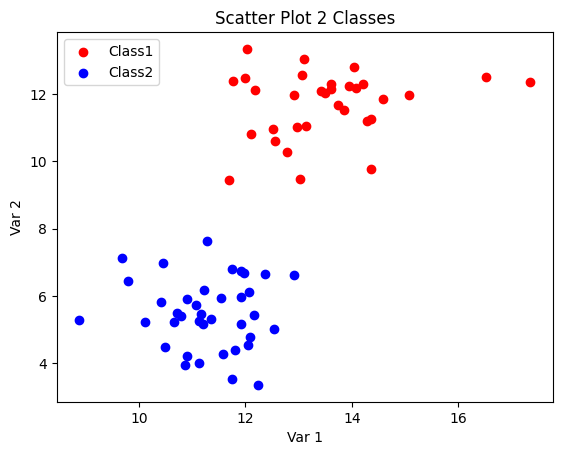

In [7]:
plot_scatter_data(x_train,y_train,'Scatter Plot 2 Classes')

### Linear Kernel SVM

In [8]:
# Then we create and train our lineal model
model_linear=svm.SVC(kernel='linear')
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

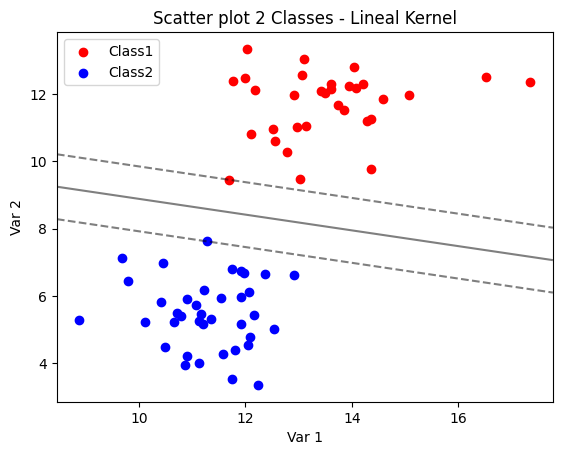

In [9]:
# We plot the hyperplane with linear kernel SVM
plot_scatter_model(x_train,y_train,model_linear\
                   ,'Scatter plot 2 Classes - Lineal Kernel')

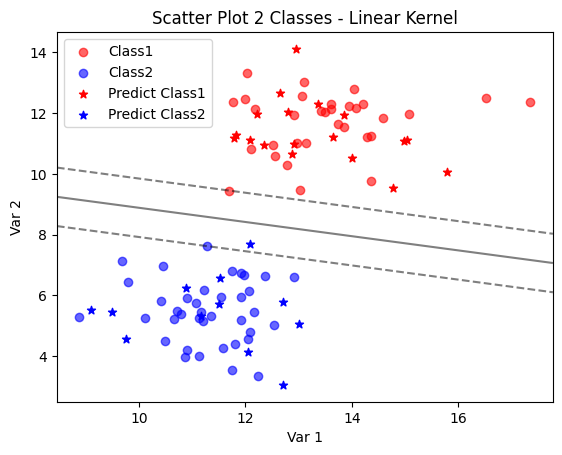

In [10]:
# Then we plot the predictions of test data
plot_scatter_predictions(x_train,y_train,model_linear\
                         ,x_test,'Scatter Plot 2 Classes - Linear Kernel')

In [11]:
# We save the predictions to calculate accuracy
predictions_lineal=model_linear.predict(x_test)

In [12]:
# We evaluate the accuracy with test data
accuracy_lineal=accuracy_score(predictions_lineal,y_test)
print('Accuracy:',accuracy_lineal)

Accuracy: 1.0


## Second Example

Then we use more complex data, with more random noise and centers slighly more close

In [13]:
# We need to generate data for purpose of the explanation
x,y=make_blobs(n_samples=100,n_features=2,centers=2\
               ,random_state=3,center_box=(5,14))

In [14]:
# We are going to split the data between test and train
x_train,x_test,y_train,y_test=train_test_split(x,y\
                                               ,train_size=0.7)

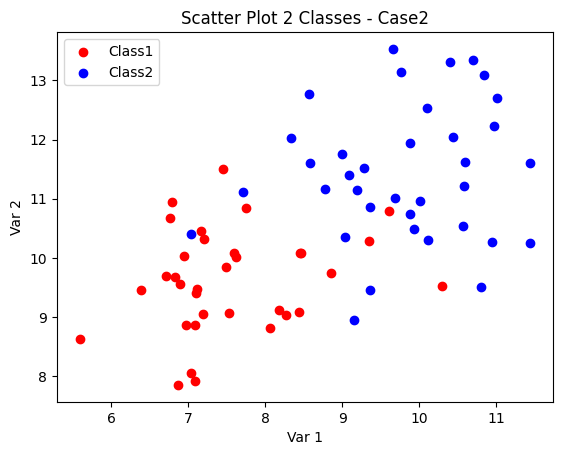

In [15]:
plot_scatter_data(x_train,y_train,'Scatter Plot 2 Classes - Case2')

### Linear Kernel

In [16]:
# Then we create and train our lineal model
model_linear2=svm.SVC(kernel='linear')
model_linear2.fit(x_train,y_train)

SVC(kernel='linear')

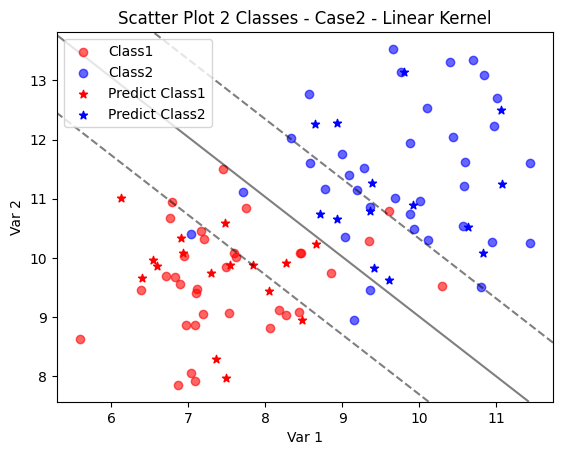

In [17]:
plot_scatter_predictions(x_train,y_train,model_linear2,x_test,'Scatter Plot 2 Classes - Case2 - Linear Kernel')

In [18]:
predictions_linear2=model_linear2.predict(x_test)

In [19]:
accuracy_linear2=accuracy_score(predictions_linear2,y_test)
print('Accuracy:',accuracy_linear2)

Accuracy: 1.0


### Polynomial Kernel

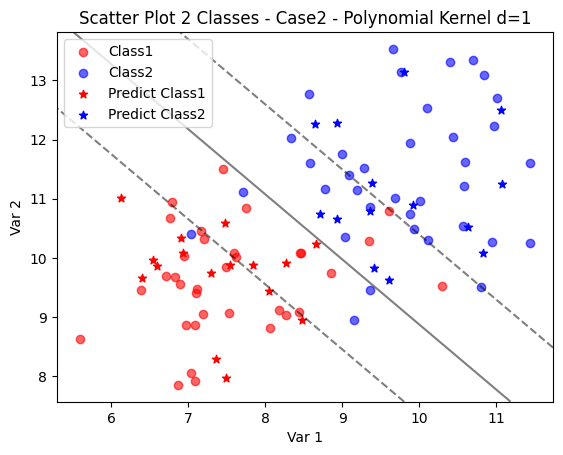

Accuracy: 1.0


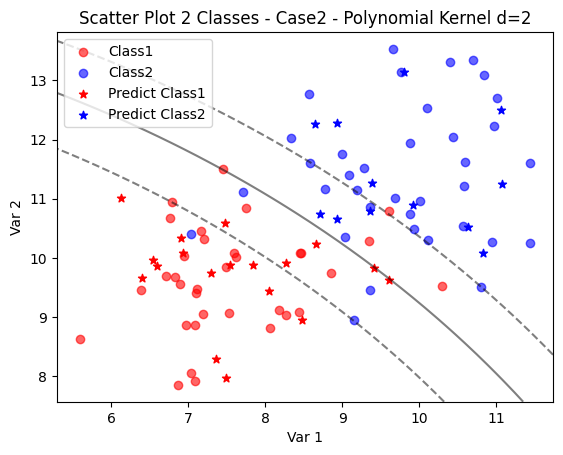

Accuracy: 0.9333333333333333


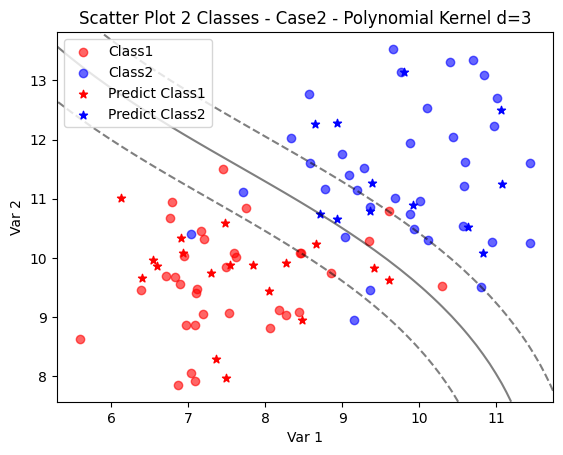

Accuracy: 0.9333333333333333


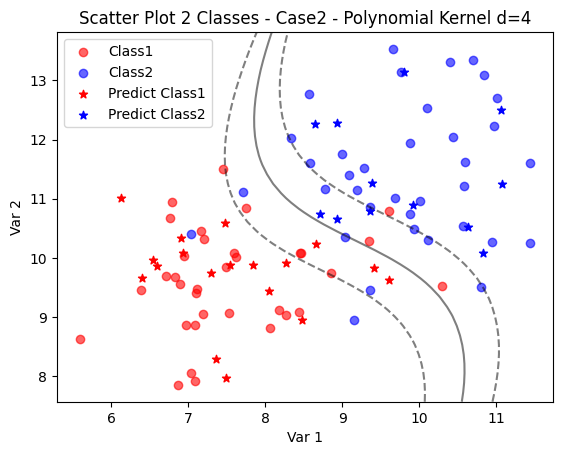

Accuracy: 0.9333333333333333


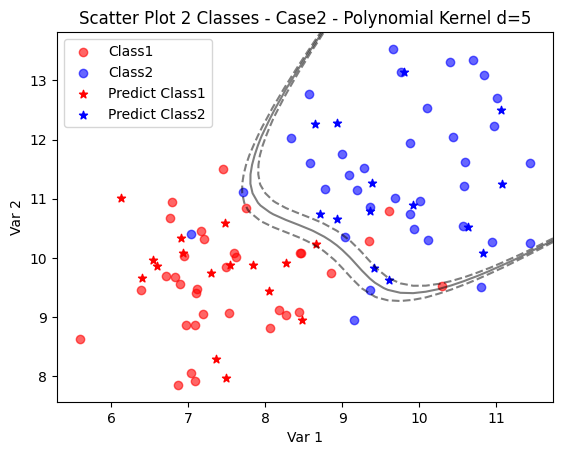

Accuracy: 1.0


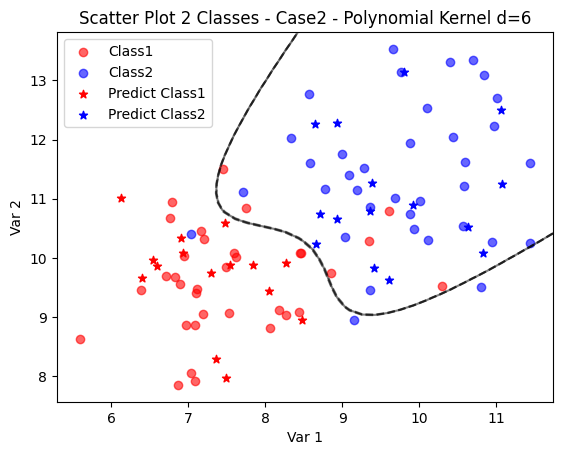

Accuracy: 0.9666666666666667


In [20]:
# Then we create and train our polynomial model d=2
degrees=[1,2,3,4,5,6]
accuracy=[]
for i in range(1,7):
    model_poly=svm.SVC(kernel='poly',degree=i,C=1)
    model_poly.fit(x_train,y_train)
    plot_scatter_predictions(x_train,y_train,model_poly,x_test,'Scatter Plot 2 Classes - Case2 - Polynomial Kernel d='+str(i))
    predictions_poly=model_poly.predict(x_test)
    accuracy_poly=accuracy_score(predictions_poly,y_test)
    print('Accuracy:',accuracy_poly)
    accuracy.append(accuracy_poly)

Text(0, 0.5, 'Accuracy in Test Data')

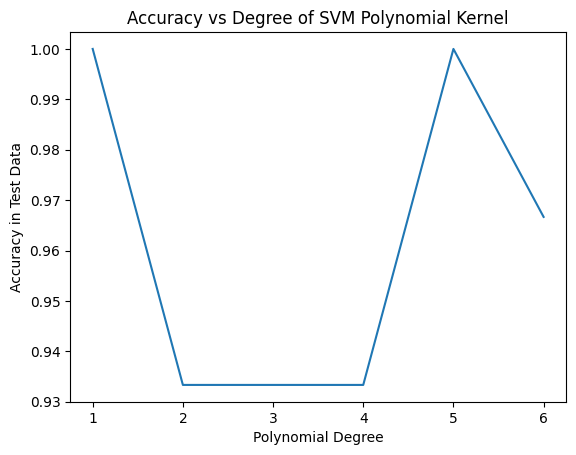

In [21]:
fig,ax=plt.subplots()
ax.plot(degrees,accuracy)
ax.set_title('Accuracy vs Degree of SVM Polynomial Kernel')
ax.set_xlabel('Polynomial Degree')
ax.set_ylabel('Accuracy in Test Data')

In [22]:
model_poly=svm.SVC(kernel='poly',degree=3,C=1)
model_poly.fit(x_train,y_train)

SVC(C=1, kernel='poly')

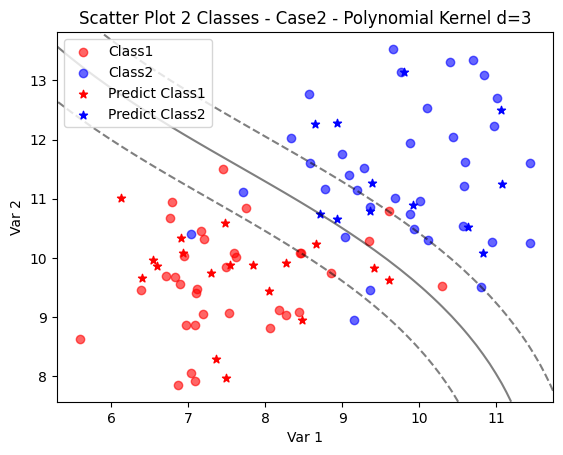

In [23]:
plot_scatter_predictions(x_train,y_train,model_poly,x_test,'Scatter Plot 2 Classes - Case2 - Polynomial Kernel d=3')

In [24]:
predictions_poly=model_poly.predict(x_test)
accuracy_poly=accuracy_score(predictions_poly,y_test)

In [25]:
accuracy_poly=accuracy_score(predictions_poly,y_test)
print('Accuracy:',accuracy_poly)

Accuracy: 0.9333333333333333


## Third Case

Now we are going to generate class data arround a center with different radious

In [26]:
# We use the circles with some random noise and different distances to the center
x,y=make_circles(100,factor=.2,noise=.2,random_state=2)
x_train,x_test,y_train,y_test=train_test_split(x,y\
                                               ,train_size=0.7)

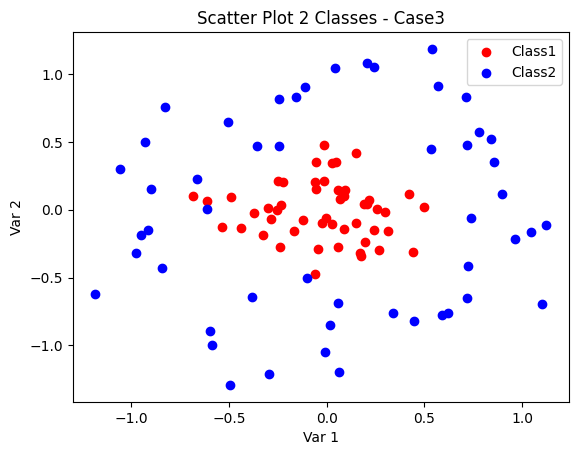

In [27]:
plot_scatter_data(x,y,'Scatter Plot 2 Classes - Case3')

### Linear Kernel SVM

In [28]:
# Then we create and train our lineal model
model_linear3=svm.SVC(kernel='linear')
model_linear3.fit(x_train,y_train)

SVC(kernel='linear')

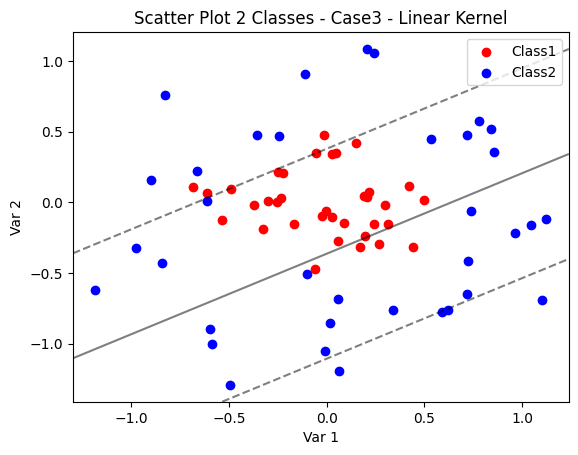

In [29]:
plot_scatter_model(x_train,y_train,model_linear3,'Scatter Plot 2 Classes - Case3 - Linear Kernel')

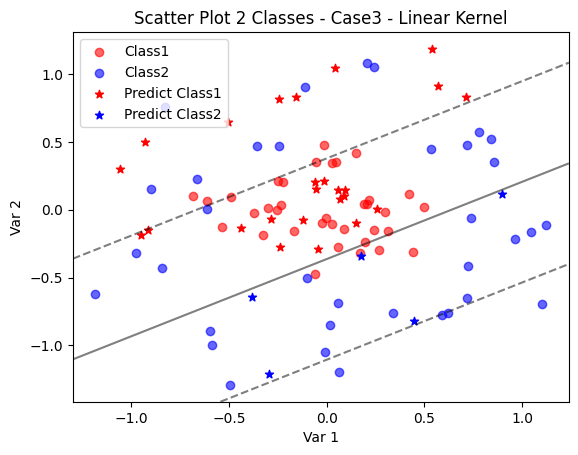

In [30]:
plot_scatter_predictions(x_train,y_train,model_linear3,x_test,'Scatter Plot 2 Classes - Case3 - Linear Kernel')

### RBF Kernel SVM

In [31]:
# Then we create and train our gaussian model
model_gaussian=svm.SVC(kernel='rbf')
model_gaussian.fit(x_train,y_train)

SVC()

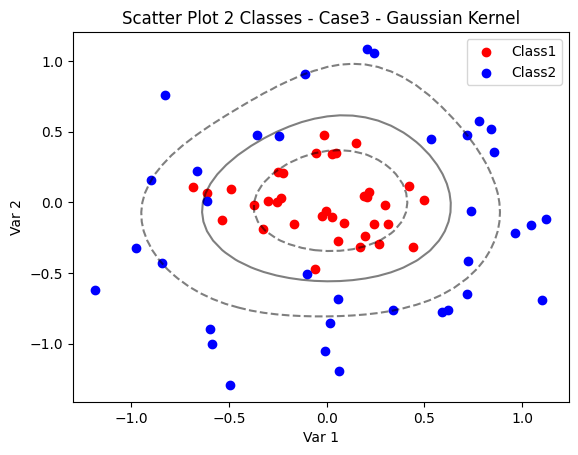

In [32]:
plot_scatter_model(x_train,y_train,model_gaussian,'Scatter Plot 2 Classes - Case3 - Gaussian Kernel')

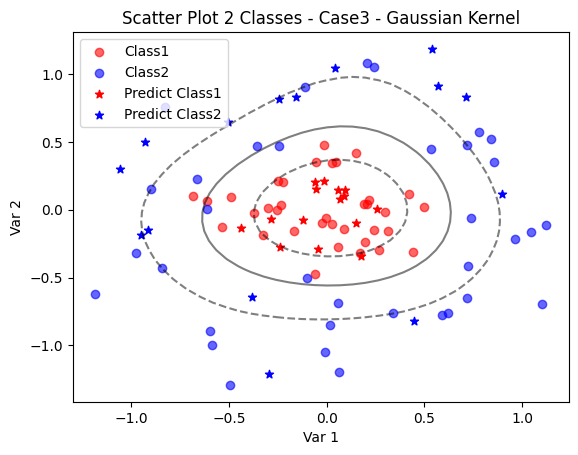

In [33]:
plot_scatter_predictions(x_train,y_train,model_gaussian,x_test,'Scatter Plot 2 Classes - Case3 - Gaussian Kernel')

In [34]:
predictions_linear3=model_linear3.predict(x_test)
predictions_gaussian=model_gaussian.predict(x_test)

In [35]:
accuracy_linear3=accuracy_score(predictions_linear3,y_test)
print('Accuracy Linear:',accuracy_linear3)
accuracy_gaussian=accuracy_score(predictions_gaussian,y_test)
print('Accuracy Gaussian:',accuracy_gaussian)

Accuracy Linear: 0.6
Accuracy Gaussian: 1.0


In [36]:
z_test=model_gaussian.decision_function(x_test)
z_train=model_gaussian.decision_function(x_train)

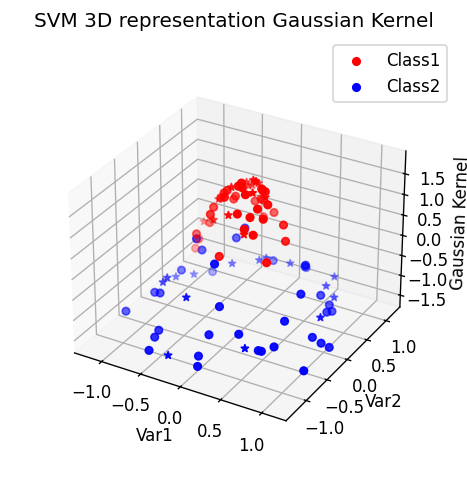

In [37]:
fig=plt.figure(dpi=(120))
ax=fig.add_subplot(projection='3d')
ax.scatter(x_test[:,0][predictions_gaussian==1]\
           ,x_test[:,1][predictions_gaussian==1]\
           ,z_test[predictions_gaussian==1],c='r',marker='*')

ax.scatter(x_train[:,0][y_train==1]\
           ,x_train[:,1][y_train==1]\
           ,z_train[y_train==1],c='r',label='Class1')

ax.scatter(x_test[:,0][predictions_gaussian==0]\
           ,x_test[:,1][predictions_gaussian==0]\
           ,z_test[predictions_gaussian==0],c='b',marker='*')

ax.scatter(x_train[:,0][y_train==0]\
           ,x_train[:,1][y_train==0]\
           ,z_train[y_train==0],c='b',label='Class2')

ax.set_xlabel('Var1')
ax.set_ylabel('Var2')
ax.set_zlabel('Gaussian Kernel')
ax.set_title('SVM 3D representation Gaussian Kernel')
ax.set_box_aspect(None, zoom=0.85)
plt.legend()